**Menghubungkan Colab dengan Gdrive**

In [1]:
#menghubungkan colab dengann gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#memanggil file dataset
path = "/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum05"

**Import Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Loading Dataset**

In [4]:
#Membaca file CSV dengan pandas
df = pd.read_csv(path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Preprocessing**

In [6]:
#cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
#cek data duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
#menghapus kolom yang tidak digunakan
df = df.drop(columns=["Id"])

**Data Understanding**

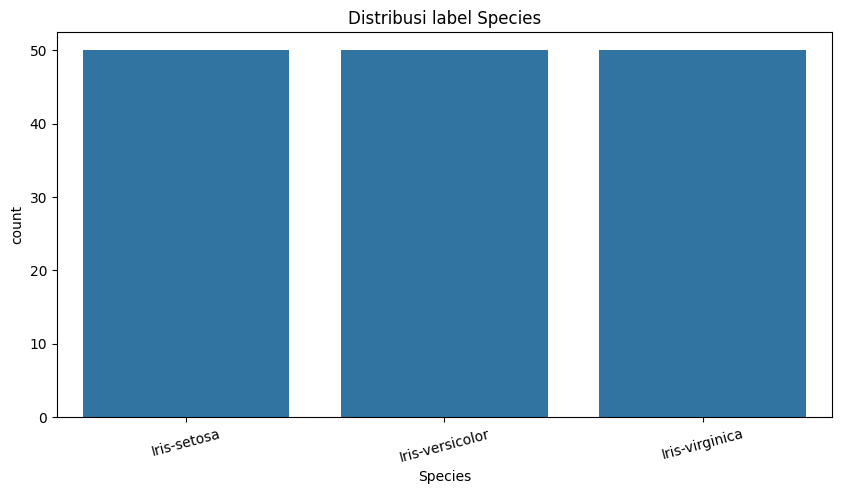

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Species', data=df)
plt.title('Distribusi label Species')
plt.xticks(rotation=15)
plt.show()

**Mapping Label ke Kode Numerik**

In [10]:
species_cat = df['Species'].astype('category')
species_classes = list(species_cat.cat.categories)
df['Species'] = species_cat.cat.codes

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Korelasi Antar Fitur**

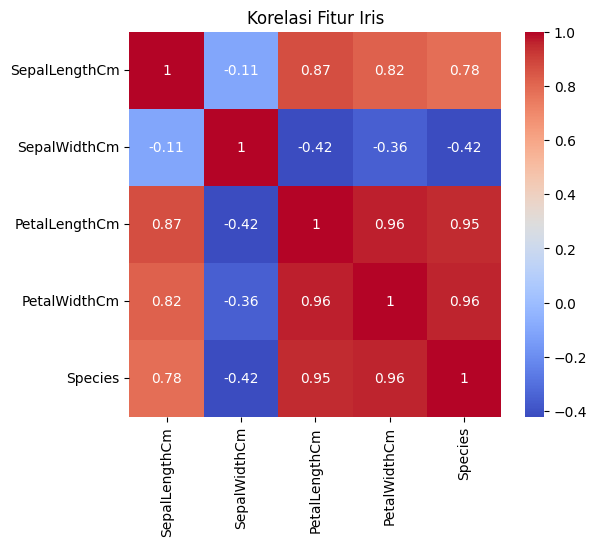

In [11]:
#korelasi
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Iris')
plt.show()

**Pembagian Data Training dan Testing**

In [12]:
#memilih fitur dan target
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]
y = df['Species']

In [13]:
#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(120, 30)

**Pembuatan Model Decision Tree**

In [14]:
#membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Evaluasi Model**

In [15]:
#evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=species_classes
))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



**Visualisasi Model**

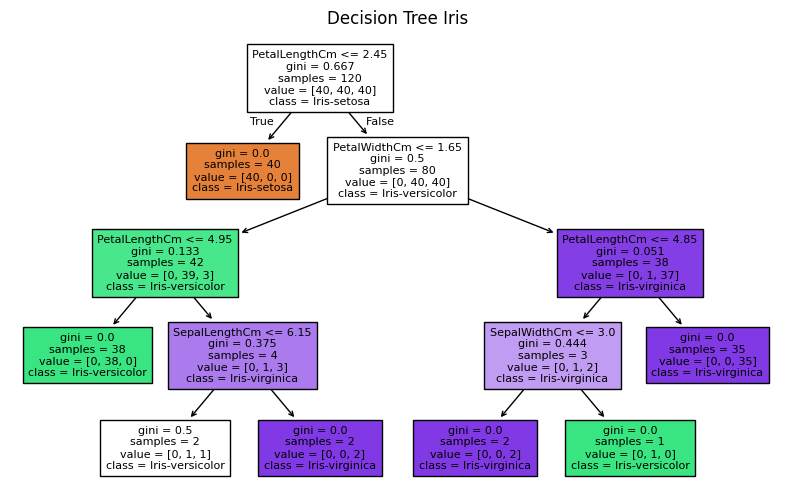

In [16]:
#visualisasi
plt.figure(figsize=(10,6))
plot_tree(
    dt,
    filled=True,
    fontsize=8,
    feature_names=feature_cols,
    class_names=species_classes
)
plt.title('Decision Tree Iris')
plt.show()

**Feature Importance (Fitur yang Paling Berpengaruh)**

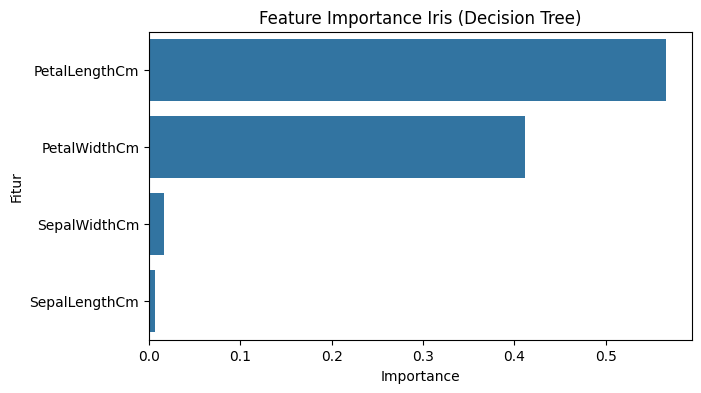

,0
PetalLengthCm,0.565639
PetalWidthCm,0.411154
SepalWidthCm,0.016878
SepalLengthCm,0.006329


In [17]:
#fitur penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance Iris (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

**Hyperparameter Tuning (Menentukan max_depth Terbaik)**

In [18]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 3 | Acc: 96.67 %
